In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
path = './data/'

pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_rows = 999

In [10]:
sido = pd.read_csv(path+'시도별지역안전지표_2015.csv', encoding='cp949')
sido_wide = pd.read_csv(path+'sido_wide.csv', encoding='cp949')

In [11]:
sido_wide.shape

(132, 324)

In [12]:
sido.shape

(17, 331)

In [13]:
def imputationcheck(sido):
    df = pd.DataFrame(data = sido.notnull().sum(axis=0), columns={'data'} )
    return df

In [14]:
def mean_score(columns,*r):
    a = 0
    b = len(r)
    for reg in r:
        a += (sido_wide.loc[sido_wide["지역"]==reg,columns].values)
    c = a/b
    return float(c)

In [15]:
imputationcheck(sido)

,data
년도,17
시도,17
지역,17
1인가구수,17
5대범죄 발생건수,17
가로등수,0
가스공급설비 면적,17
가스사고 발생건수,0
가스사고 부상자수,0
가스사고 사망자수,0


In [16]:
#모두 비어있는 변수를 삭제
sido.dropna(axis=1, how='all',inplace=True)
sido.shape

(17, 202)

In [17]:
#14개 이하로 차있는 열은 삭제
lst = imputationcheck(sido).loc[imputationcheck(sido).data<=14].index.tolist()
sido.drop(labels=lst, axis=1, inplace=True)
sido.shape

(17, 173)

In [18]:
imputationcheck(sido)

,data
년도,17
시도,17
지역,17
1인가구수,17
5대범죄 발생건수,17
가스공급설비 면적,17
가스사고발생건수,17
가해(타살) 사망자수,17
감염병 발생건수,17
감염병 사망자수,17


In [19]:
#15개 16개가 차있는 열들에 대해 imputation 진행

In [20]:
imputationcheck(sido).loc[imputationcheck(sido).data<17]

,data
교통사고사망자수(고속도로),16
구급발생건수,16
대기오염도,16
산불피해면적,16
성폭력 발생건수,16
실업률,16
열공급설비 면적,15
주간인구지수,16
지역별 부도업체수,16
황사 발생건수,15


In [21]:
#교통사고사망자수(고속도로) 제주도 -- 0으로 채운다
sido[['시도','교통사고사망자수(고속도로)']]

,시도,교통사고사망자수(고속도로)
0,강원도,0.03885
1,경기도,0.05260
2,경상남도,0.08059
3,경상북도,0.15921
4,광주광역시,0.00000
5,대구광역시,0.04813
6,대전광역시,0.01958
7,부산광역시,0.00852
8,서울특별시,0.00099
9,세종특별자치시,0.00000


In [22]:
sido['교통사고사망자수(고속도로)'].fillna(0,inplace=True)

In [23]:
#구급발생건수 -- 직전년도 것으로
sido[['시도','구급발생건수']]

,시도,구급발생건수
0,강원도,41.57489
1,경기도,29.90412
2,경상남도,27.84264
3,경상북도,36.25230
4,광주광역시,21.88519
5,대구광역시,20.86422
6,대전광역시,25.86484
7,부산광역시,21.44115
8,서울특별시,25.51461
9,세종특별자치시,NaN


In [24]:
val = float(sido_wide.loc[sido_wide.지역=='2014_세종특별자치시',['구급발생건수']].values)
sido_wide.loc[sido_wide.지역=='2014_세종특별자치시',['지역','구급발생건수']]

,지역,구급발생건수
107,2014_세종특별자치시,17.10969


In [25]:
sido['구급발생건수'].fillna(val, inplace=True)
sido[['시도','구급발생건수']]

,시도,구급발생건수
0,강원도,41.57489
1,경기도,29.90412
2,경상남도,27.84264
3,경상북도,36.25230
4,광주광역시,21.88519
5,대구광역시,20.86422
6,대전광역시,25.86484
7,부산광역시,21.44115
8,서울특별시,25.51461
9,세종특별자치시,17.10969


In [26]:
#대기오염도 --인접지역(충남,충북,대전)의 평균:45
sido[['시도','대기오염도']]

,시도,대기오염도
0,강원도,51.652
1,경기도,54.659
2,경상남도,48.554
3,경상북도,49.652
4,광주광역시,41.552
5,대구광역시,45.454
6,대전광역시,41.550
7,부산광역시,48.456
8,서울특별시,46.562
9,세종특별자치시,NaN


In [27]:
val = mean_score('대기오염도','2015_충청남도','2015_충청북도','2015_대전광역시')
val

45.551666666666655

In [28]:
sido['대기오염도'].fillna(val, inplace=True)
sido[['시도','대기오염도']]

,시도,대기오염도
0,강원도,51.652000
1,경기도,54.659000
2,경상남도,48.554000
3,경상북도,49.652000
4,광주광역시,41.552000
5,대구광역시,45.454000
6,대전광역시,41.550000
7,부산광역시,48.456000
8,서울특별시,46.562000
9,세종특별자치시,45.551667


In [29]:
#황사 발생건수 --부산:인접지역(울산, 경북, 경남)평균
#황사발생건수 --세종:인접지역(충남,충북,대전)의 평균:45
sido[['시도','황사 발생건수']]

,시도,황사 발생건수
0,강원도,0.00220
1,경기도,0.00079
2,경상남도,0.00285
3,경상북도,0.00079
4,광주광역시,0.01397
5,대구광역시,NaN
6,대전광역시,0.01113
7,부산광역시,0.01039
8,서울특별시,0.01652
9,세종특별자치시,NaN


In [30]:
val1 = mean_score('황사 발생건수','2015_충청남도','2015_충청북도','2015_대전광역시')
val1

0.005043333333333333

In [31]:
val2 = mean_score('황사 발생건수','2015_경상남도','2015_경상북도','2015_울산광역시','2015_부산광역시')
val2

0.005392500000000001

In [32]:
sido.loc[5,'황사 발생건수'] = val2
sido.loc[9,'황사 발생건수'] = val1
sido['황사 발생건수']
#sido[['시도','황사 발생건수']]

0     0.002200
1     0.000790
2     0.002850
3     0.000790
4     0.013970
5     0.005393
6     0.011130
7     0.010390
8     0.016520
9     0.005043
10    0.007540
11    0.015270
12    0.003330
13    0.002110
14    0.014600
15    0.002920
16    0.001080
Name: 황사 발생건수, dtype: float64

In [33]:
#산불피해면적 --제주특별자치도 산불통계현황 (2018.12.31) - 0 
sido['산불피해면적'].fillna(0, inplace=True)
sido[['시도','산불피해면적']]

,시도,산불피해면적
0,강원도,0.00119
1,경기도,0.00054
2,경상남도,0.00061
3,경상북도,0.00250
4,광주광역시,0.00102
5,대구광역시,0.00070
6,대전광역시,0.00454
7,부산광역시,0.00330
8,서울특별시,0.00167
9,세종특별자치시,0.01086


In [34]:
#성폭력발생건수 -범죄발생건수(강간.강제추행)가
#통계값: 세종이 최소값, 그다음은 경북
#최솟값 경북으로 채움
sido[['시도','성폭력 발생건수']]
val = sido['성폭력 발생건수'].min()
sido['성폭력 발생건수'].fillna(val, inplace=True)
sido[['시도','성폭력 발생건수']]

,시도,성폭력 발생건수
0,강원도,4.48058
1,경기도,4.88759
2,경상남도,4.02954
3,경상북도,3.91737
4,광주광역시,6.93144
5,대구광역시,6.28092
6,대전광역시,5.43801
7,부산광역시,6.58067
8,서울특별시,8.43591
9,세종특별자치시,3.91737


In [35]:
#실업률 - 
#KOIS 행정구역 시도/연령별 실업률 1817년도에 충북충남과 유사, 대도시 대전은 제외.
sido[['시도','실업률']]
val = mean_score('실업률','2015_충청남도','2015_충청북도')
sido['실업률'].fillna(val, inplace=True)
sido[['시도','실업률']]

,시도,실업률
0,강원도,3.1
1,경기도,3.4
2,경상남도,2.5
3,경상북도,2.9
4,광주광역시,2.8
5,대구광역시,3.9
6,대전광역시,3.4
7,부산광역시,3.8
8,서울특별시,4.5
9,세종특별자치시,3.2


In [36]:
#주간인구지수 -- 통계값
sido[['시도','주간인구지수']]
sido['주간인구지수'].fillna(105.4, inplace=True)
sido[['시도','주간인구지수']]
#census 인구총조사(5년단위) #2017년보고서, 2015년조사한 세종시지수 = 105.4
# sido.loc[9,'주간인구지수']

,시도,주간인구지수
0,강원도,101.3
1,경기도,92.7
2,경상남도,101.0
3,경상북도,104.8
4,광주광역시,96.6
5,대구광역시,95.4
6,대전광역시,98.2
7,부산광역시,98.4
8,서울특별시,108.6
9,세종특별자치시,105.4


In [37]:
#지역별 부도업체수 -인접지역평균(2)
sido[['시도','지역별 부도업체수']]
val = mean_score('지역별 부도업체수','2015_충청남도','2015_충청북도')
sido['지역별 부도업체수'].fillna(val, inplace=True)
sido[['시도','지역별 부도업체수']]

,시도,지역별 부도업체수
0,강원도,0.09712
1,경기도,0.13999
2,경상남도,0.11939
3,경상북도,0.08516
4,광주광역시,0.17617
5,대구광역시,0.23263
6,대전광역시,0.11751
7,부산광역시,0.17901
8,서울특별시,0.29001
9,세종특별자치시,0.05982


In [38]:
#열공급설비 면적
val = sido[['시도','열공급설비 면적']].median()
val
sido['열공급설비 면적'].fillna(114.22333, inplace=True)
sido[['시도','열공급설비 면적']]

,시도,열공급설비 면적
0,강원도,2.19244
1,경기도,114.22333
2,경상남도,3.63201
3,경상북도,114.22333
4,광주광역시,130.79988
5,대구광역시,182.07096
6,대전광역시,188.74872
7,부산광역시,103.09203
8,서울특별시,348.95825
9,세종특별자치시,517.60668


In [39]:
len(imputationcheck(sido))

173

In [40]:
imputationcheck(sido)

,data
년도,17
시도,17
지역,17
1인가구수,17
5대범죄 발생건수,17
가스공급설비 면적,17
가스사고발생건수,17
가해(타살) 사망자수,17
감염병 발생건수,17
감염병 사망자수,17


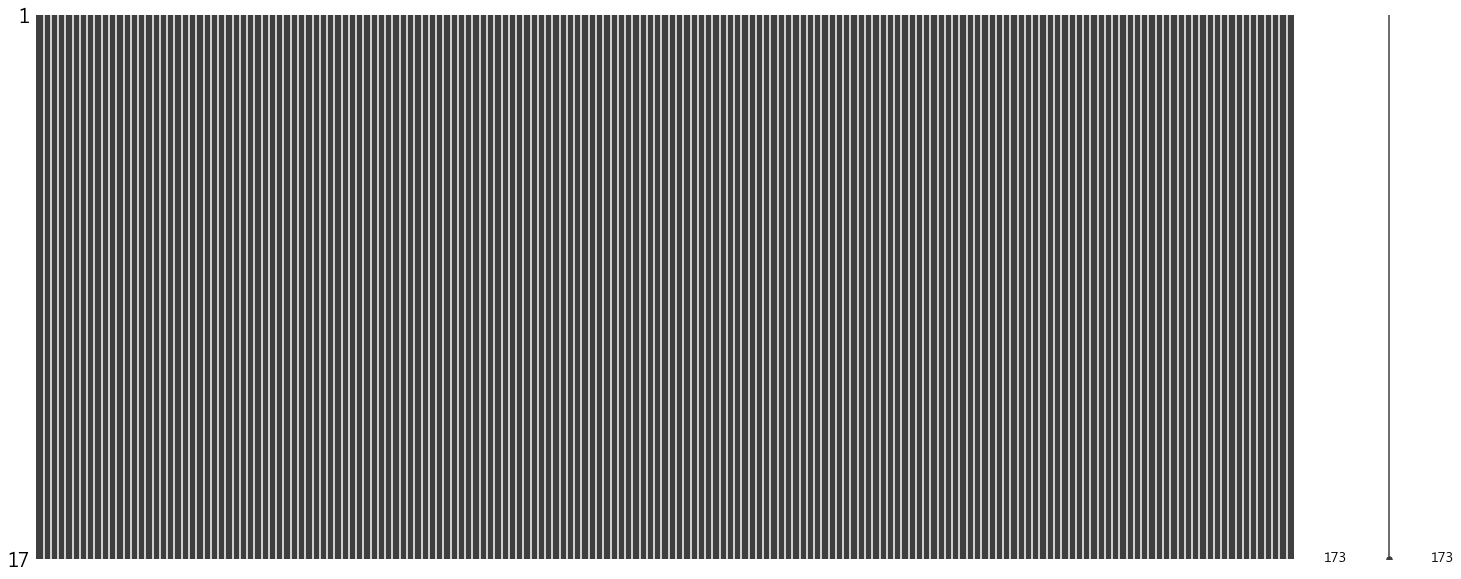

In [41]:
msno.matrix(sido)

In [42]:
sido.to_csv(path + 'imp_시도별지역안전지표_2015.csv',encoding='cp949')
